In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:
df = pd.read_csv('raw_data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df = df.drop(labels='Unnamed: 32', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


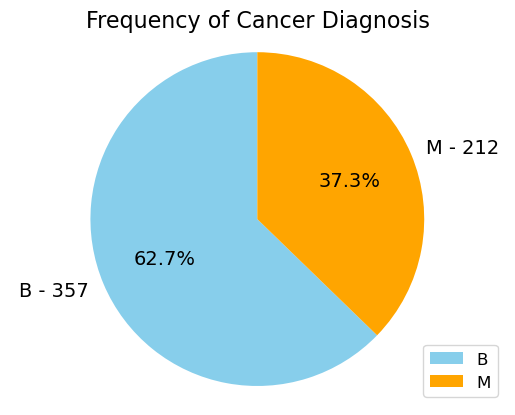

In [26]:
# Create a frequency table
diagnosis_table = df['diagnosis'].value_counts()

# Create a pie chart
diagnosis_prop_table = diagnosis_table / diagnosis_table.sum() * 100
colors = ['skyblue', 'orange']

# Modify the labels to include the diagnosis and count
labels = [f"{diagnosis} - {count}" for diagnosis, count in zip(diagnosis_prop_table.index, diagnosis_table)]

# Create the pie chart with modified labels
plt.pie(diagnosis_prop_table, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90,
        textprops={'fontsize': 14})

# Create the legend with count only
legend_labels = [f"{diagnosis}" for diagnosis, count in zip(diagnosis_table.index, diagnosis_table)]
plt.legend(legend_labels, loc='best', fontsize=12)

plt.title('Frequency of Cancer Diagnosis', fontsize=16)
plt.axis('equal')
plt.show()

<AxesSubplot:>

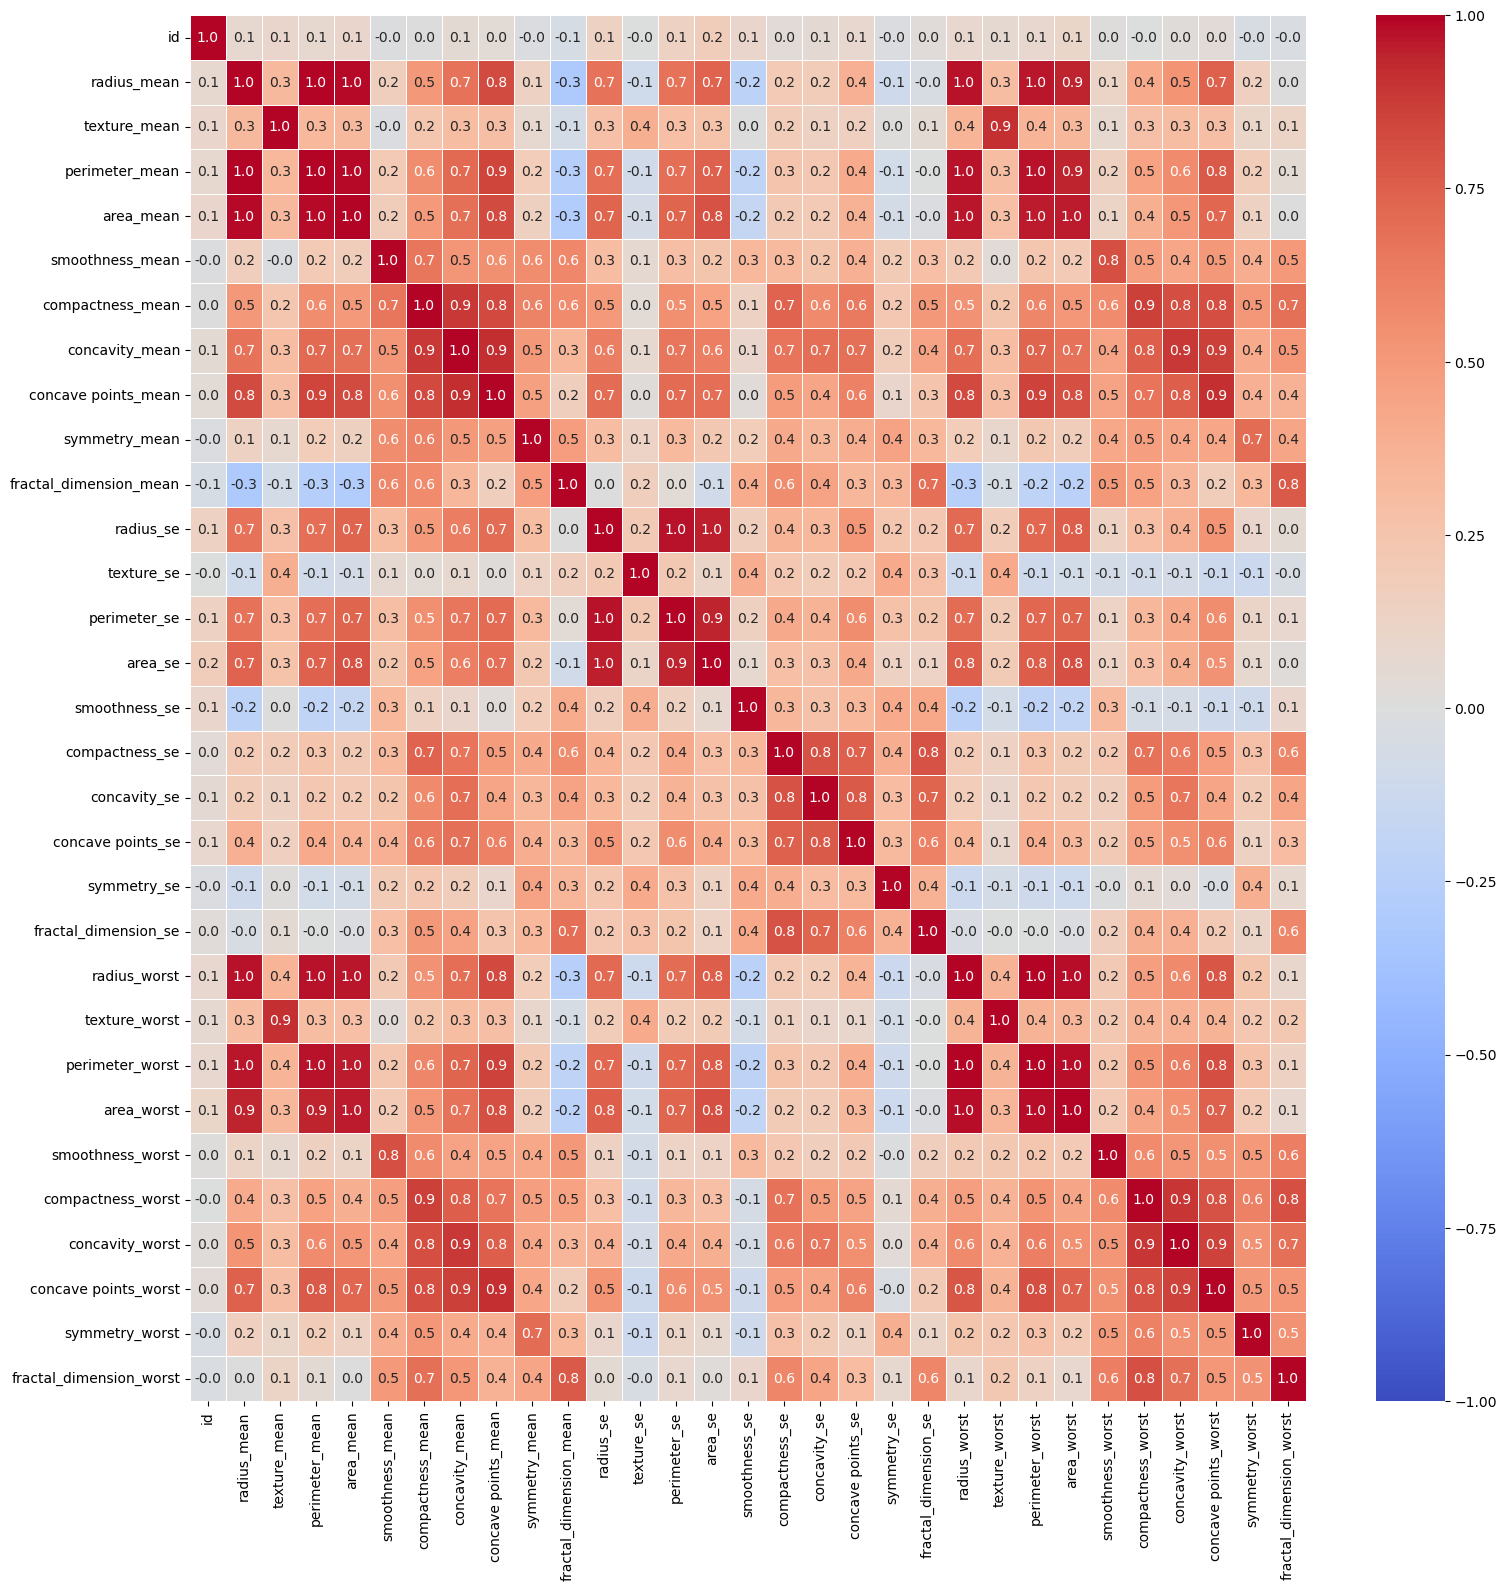

In [30]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', vmin=-1, vmax=1, cmap='coolwarm',ax=ax)

# !imbalance

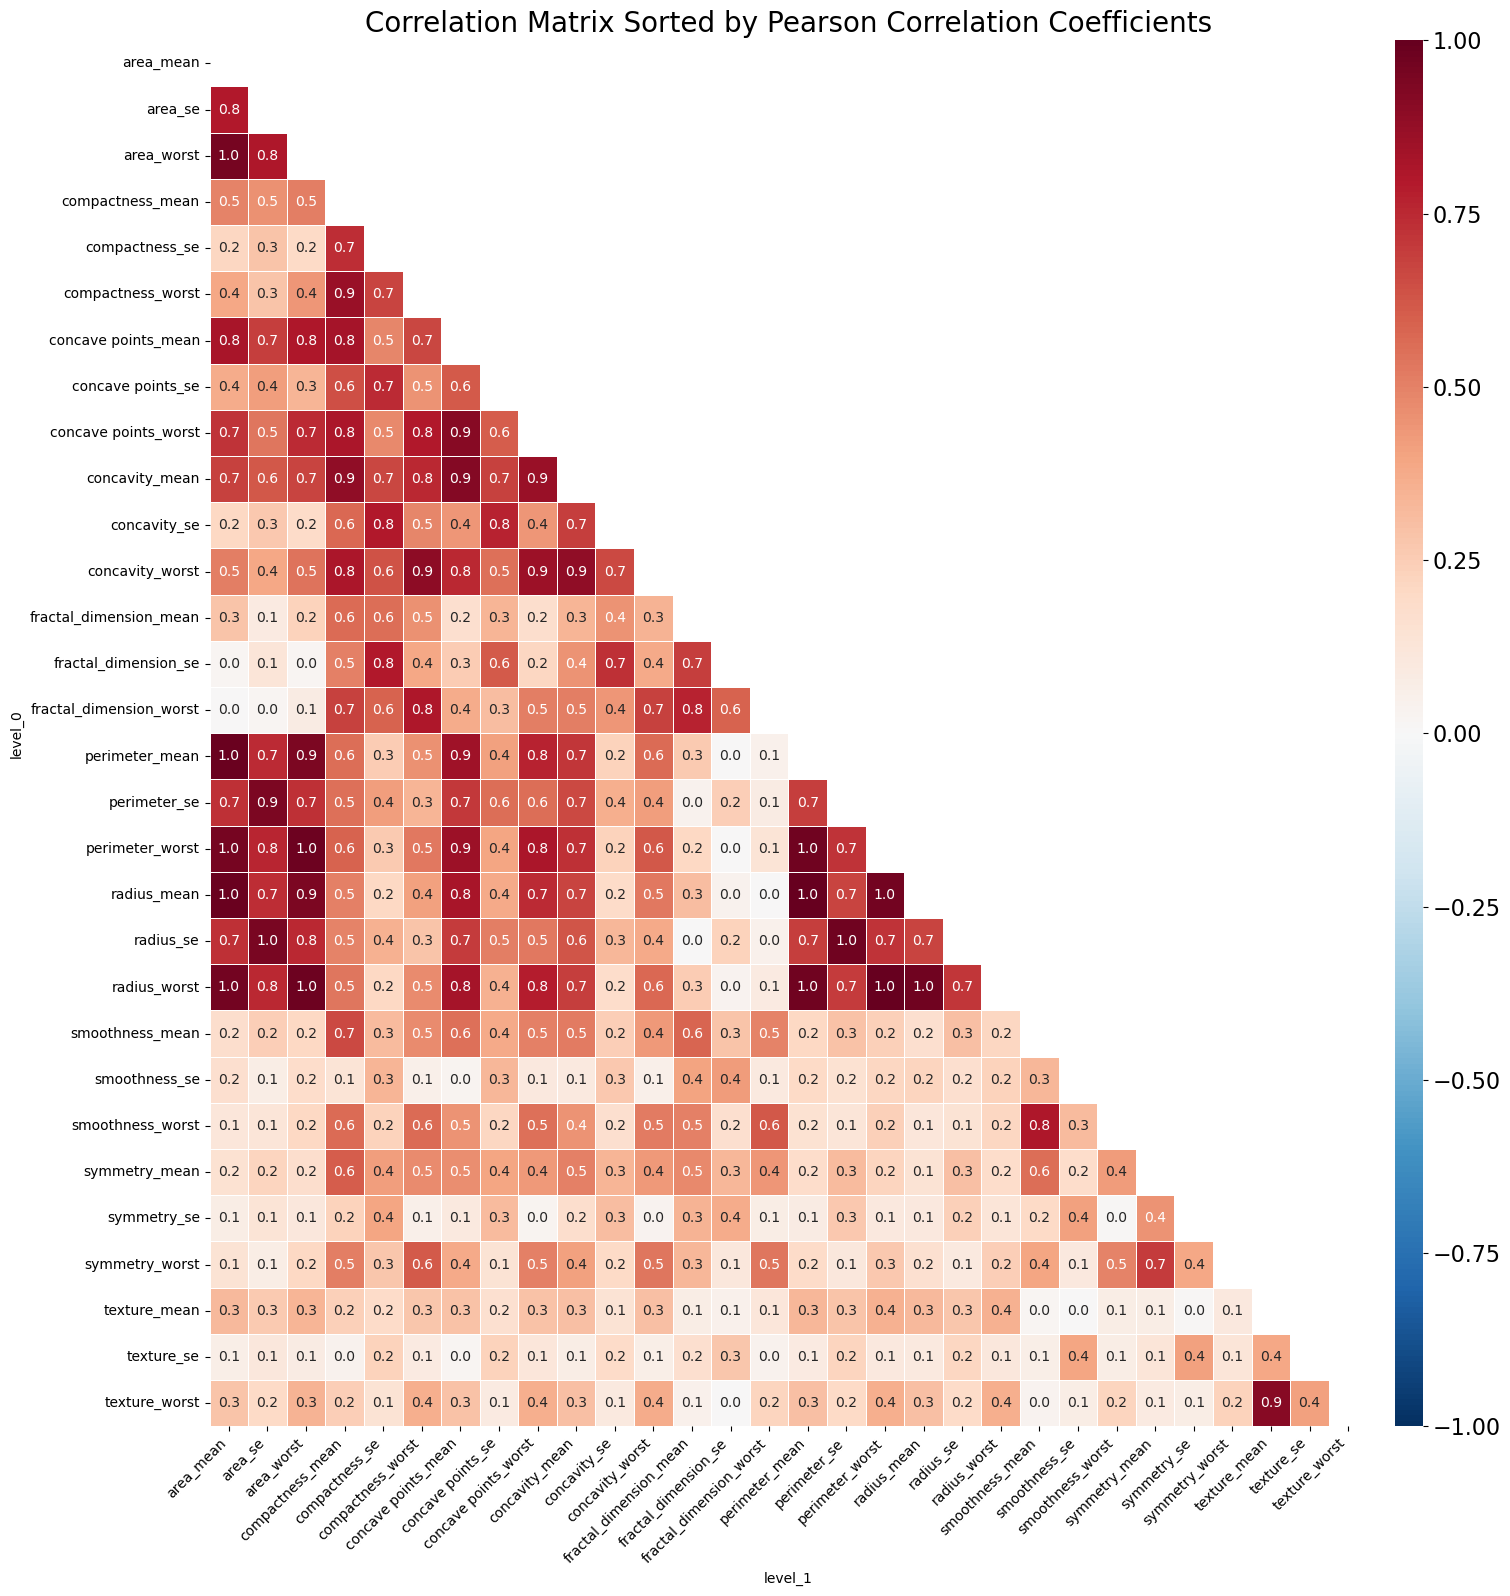

In [18]:
# Set the figure size
f, ax = plt.subplots(figsize=(18, 18))

# Create correlation matrix
corr = X.corr()

# Sort correlation matrix values by absolute value of Pearson correlation coefficient in descending order
corr_sorted = corr.abs().unstack().sort_values(ascending=False).reset_index()
corr_sorted.rename(columns={0:'correlation'}, inplace=True)
corr_sorted.drop(corr_sorted[corr_sorted['level_0'] == corr_sorted['level_1']].index, inplace=True)

# Create a mask to show only half of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap with the sorted and masked correlation matrix
heatmap = sns.heatmap(corr_sorted.pivot(index='level_0', columns='level_1', values='correlation'), 
                      mask=mask, 
                      annot=True, 
                      annot_kws={"size": 10},
                      linewidths=.5, 
                      fmt='.1f', 
                      vmin=-1, 
                      vmax=1, 
                      cmap='RdBu_r', 
                      ax=ax, 
                      cbar_kws={"orientation": "vertical", "pad": 0.02, "aspect": 50})

# Set the title of the heatmap
ax.set_title("Correlation Matrix Sorted by Pearson Correlation Coefficients", fontsize=20)

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=45, ha='right')

# Adjust the position of the color bar
heatmap.figure.axes[-1].yaxis.label.set_size(20)
heatmap.figure.axes[-1].tick_params(labelsize=16)

# Show the plot
plt.show()


In [8]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object